-0.16630349620468032 3.5809910209099236
-0.21136936583482846 3.572755637025397
-0.256073419828659 3.56292246250337
-0.3003526731814169 3.5515169029101483
-0.3441455143211826 3.538567886657087


(-10.0, 10.0)

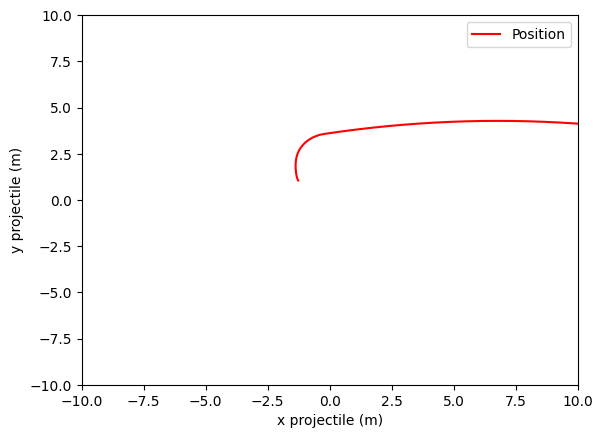

In [16]:
# JOHN FINAL code
import numpy as np
import matplotlib.pyplot as plt

NP = 2**12  # number of simulation points
i = np.linspace(1, NP, NP)  # creates an array of integers from 1 to NP in steps of 1
total_time = 10  # total time of flight sec
dt = total_time / NP  #  %delta t
t = i * dt  # array of accumulated time in sec

# Constants
g = 9.81  # m/s^2  (Acceleration of Gravity on earth)
M = 133  # kg    (Mass of the counterweight)
m = 1  # kg      (Mass of the projectile)
L1 = 1 / 5  # m    (Length of the counterweight arm)
L2 = 4 / 5  # m    (Length of the throwing arm)
L3 = 4 / 5  # m    (Length of the rope/sling)
h = 2  # m
phiInit = np.pi * 3 / 4  # -rad      (inital sling angle)
thetaInit = 0.5  # rad          (inital arm angle)
launchTheta = 90 * np.pi / 180  # rad    (Launch angle)

# Initial Angular Velocity
phiDInit = 0
thetaDInit = 0

###initialize arrays to be an array of all zeros (defining an array of zeros rather than an empty one helps the computer save memory
# when updating values those values to real physical values
phiDD = np.zeros([NP])
phiD = np.zeros([NP])
phi = np.zeros([NP])

thetaDD = np.zeros([NP])
thetaD = np.zeros([NP])
theta = np.zeros([NP])

yM = np.zeros([NP])
xM = np.zeros([NP])

ym = np.zeros([NP])
xm = np.zeros([NP])

####initializing position and velocity
phi[0] = phiInit
phiD[0] = phiDInit

theta[0] = thetaInit
thetaD[0] = phiDInit

yM[0] = L1 * np.sin(thetaInit) + h
xM[0] = L1 * np.cos(thetaInit)

ym[0] = -L2 * np.sin(thetaInit) - L3 * np.sin(phiInit) + h
xm[0] = -L2 * np.cos(thetaInit) + L3 * np.cos(phiInit)

# Verlet Initialization
phiDD[0] = (
    -2 * L2 * L3 * thetaDD[0] * np.cos(theta[0] + phi[0])
    + 2 * L3 * L2 * thetaD[0] * (thetaD[0] + phiD[0]) * np.sin(theta[0] + phi[0])
    + m * g * L3 * np.cos(phi[0])
    - 2 * L3 * L2 * phiD[0] * thetaD[0] * np.sin(theta[0] + phi[0])
) / (m * L3**2)
phiOld = phi[0] - phiD[0] * dt + 0.5 * phiDD[0] * dt**2
phiNow = phi[0]
phiNew = 0

thetaDD[0] = (
    -M * g * L1 * np.cos(theta[0])
    + m * g * L2 * np.cos(theta[0])
    - 2 * L3 * L2 * thetaD[0] * phiD[0] * np.sin(theta[0] + phi[0])
    - 2 * L3 * L2 * phiDD[0] * np.cos(theta[0] + phi[0])
    + 2 * L3 * L2 * phiD[0] * (thetaD[0] + phiD[0]) * np.sin(theta[0] + phi[0])
) / (M * L1**2 + m * L2**2)
thetaOld = theta[0] - thetaD[0] * dt + 0.5 * thetaDD[0] * dt**2
thetaNow = theta[0]
thetaNew = 0

j = 0

while thetaNow > -launchTheta:  # Treduchet Motion
    j = j + 1
    phi[j] = phiNow
    theta[j] = thetaNow

    phiDD[j] = (
        -2 * L2 * L3 * thetaDD[j] * np.cos(theta[j] + phi[j])
        + 2 * L3 * L2 * thetaD[j] * (thetaD[j] + phiD[j]) * np.sin(theta[j] + phi[j])
        + m * g * L3 * np.cos(phi[j])
        - 2 * L3 * L2 * phiD[j] * thetaD[j] * np.sin(theta[j] + phi[j])
    ) / (m * L3**2)
    thetaDD[j] = (
        -M * g * L1 * np.cos(theta[j])
        + m * g * L2 * np.cos(theta[j])
        - 2 * L3 * L2 * thetaD[j] * phiD[j] * np.sin(theta[j] + phi[j])
        - 2 * L3 * L2 * phiDD[j] * np.cos(theta[j] + phi[j])
        + 2 * L3 * L2 * phiD[j] * (thetaD[j] + phiD[j]) * np.sin(theta[j] + phi[j])
    ) / (M * L1**2 + m * L2**2)

    phiNew = 2 * phiNow - phiOld + dt**2 * phiDD[j]
    phiOld = phiNow
    phiNow = phiNew

    thetaNew = 2 * thetaNow - thetaOld + dt**2 * thetaDD[j]
    thetaOld = thetaNow
    thetaNow = thetaNew

    phiD[j + 1] = phiD[j] + phiDD[j] * dt
    thetaD[j + 1] = thetaD[j] + thetaDD[j] * dt

    yM[j] = L1 * np.sin(thetaNow) + h
    xM[j] = L1 * np.cos(thetaNow)
    ym[j] = -L2 * np.sin(thetaNow) - L3 * np.sin(phiNow) + h
    xm[j] = -L2 * np.cos(thetaNow) + L3 * np.cos(phiNow)

launchYm = ym[j]
launchXm = xm[j]

ymDInit = -L2 * thetaD[j] * np.cos(theta[j]) - L3 * phiD[j] * np.cos(phi[j])
xmDInit = L2 * thetaD[j] * np.sin(theta[j]) - L3 * phiD[j] * np.sin(phi[j])

for i in range(5):
    print(xm[j - i], ym[j - i])
c = 0
while j < (NP - 1):  # Begin Projectile Motion
    j = j + 1
    c = c + 1
    ym[j] = ymDInit * (c) * dt - g / 2 * ((c) * dt) ** 2 + launchYm
    xm[j] = xmDInit * (c) * dt + launchXm
"""
plt.figure()
plt.plot(t,theta,"-r", label="angle")

plt.legend(loc="upper right")
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.ylim(-20, 20)
plt.xlim(0,10)

plt.figure()
plt.plot(xM,yM, color = "red", label="Position")

plt.legend(loc="upper right")
plt.xlabel('x projectile (m)')
plt.ylabel('y projectile (m)')
plt.ylim(-10, 10)
plt.xlim(-10, 10)
"""
plt.figure()
plt.plot(xm, ym, color="red", label="Position")

plt.legend(loc="upper right")
plt.xlabel("x projectile (m)")
plt.ylabel("y projectile (m)")
plt.ylim(-10, 10)
plt.xlim(-10, 10)

185.99915048266027
186.08234543922887
186.16554039579748
186.24873535236608
186.3319303089347
186.4151252655033
186.4983202220719
186.5815151786405
186.6647101352091
186.7479050917777
186.8311000483463
186.9142950049149
186.9974899614835
187.08068491805207


(-20.0, 300.0)

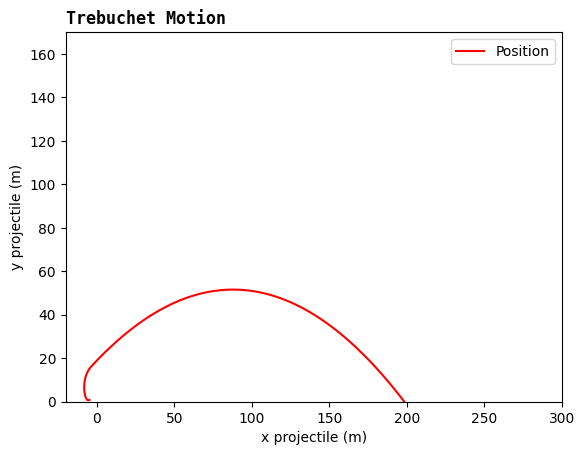

In [21]:
# JOHN's new code
import numpy as np
import matplotlib.pyplot as plt

NP = 2**12  # number of simulation points
i = np.linspace(1, NP, NP)  # creates an array of integers from 1 to NP in steps of 1
total_time = 10  # total time of flight sec
dt = total_time / NP  #  %delta t
t = i * dt  # array of accumulated time in sec

# Constants
g = 9.81  # m/s^2  (Acceleration of Gravity on earth)
m = 550  # kg      (Mass of the projectile)
M = m * 133  # kg    (Mass of the counterweight)
L1 = 10 * 1 / 10  # m    (Length of the counterweight arm)
L2 = 10 * 9 / 10  # m    (Length of the throwing arm)
L3 = 10 * 2 / 10  # m    (Length of the rope/sling)
h = 10  # m
phiInit = np.pi * 9 / 10  # rad      (inital sling angle)
thetaInit = np.pi * 8 / 20  # rad          (inital arm angle)
launchTheta = np.pi * 3 / 10  # rad    (Launch angle)

# Initial Angular Velocity
phiDInit = 0
thetaDInit = 0

###initialize arrays to be an array of all zeros (defining an array of zeros rather than an empty one helps the computer save memory
# when updating vlaues those values to real physical values
phiDD = np.zeros([NP])
phiD = np.zeros([NP])
phi = np.zeros([NP])

thetaDD = np.zeros([NP])
thetaD = np.zeros([NP])
theta = np.zeros([NP])

yM = np.zeros([NP])
xM = np.zeros([NP])

ym = np.zeros([NP])
xm = np.zeros([NP])

####initializing position and velocity
phi[0] = phiInit
phiD[0] = phiDInit

theta[0] = thetaInit
thetaD[0] = phiDInit

yM[0] = L1 * np.sin(thetaInit) + h
xM[0] = L1 * np.cos(thetaInit)

ym[0] = -L2 * np.sin(thetaInit) - L3 * np.sin(phiInit) + h
xm[0] = -L2 * np.cos(thetaInit) + L3 * np.cos(phiInit)

# Verlet Initialization
phiDD[0] = (
    -2 * L2 * L3 * thetaDD[0] * np.cos(theta[0] + phi[0])
    + 2 * L3 * L2 * thetaD[0] * (thetaD[0] + phiD[0]) * np.sin(theta[0] + phi[0])
    + m * g * L3 * np.cos(phi[0])
    - 2 * L3 * L2 * phiD[0] * thetaD[0] * np.sin(theta[0] + phi[0])
) / (m * L3**2)
phiOld = phi[0] - phiD[0] * dt + 0.5 * phiDD[0] * dt**2
phiNow = phi[0]
phiNew = 0

thetaDD[0] = (
    -M * g * L1 * np.cos(theta[0])
    + m * g * L2 * np.cos(theta[0])
    - 2 * L3 * L2 * thetaD[0] * phiD[0] * np.sin(theta[0] + phi[0])
    - 2 * L3 * L2 * phiDD[0] * np.cos(theta[0] + phi[0])
    + 2 * L3 * L2 * phiD[0] * (thetaD[0] + phiD[0]) * np.sin(theta[0] + phi[0])
) / (M * L1**2 + m * L2**2)
thetaOld = theta[0] - thetaD[0] * dt + 0.5 * thetaDD[0] * dt**2
thetaNow = theta[0]
thetaNew = 0

j = 0

while thetaNow > -launchTheta:  # Treduchet Motion
    j = j + 1
    phi[j] = phiNow
    theta[j] = thetaNow

    phiDD[j] = (
        -2 * L2 * L3 * thetaDD[j] * np.cos(theta[j] + phi[j])
        + 2 * L3 * L2 * thetaD[j] * (thetaD[j] + phiD[j]) * np.sin(theta[j] + phi[j])
        + m * g * L3 * np.cos(phi[j])
        - 2 * L3 * L2 * phiD[j] * thetaD[j] * np.sin(theta[j] + phi[j])
    ) / (m * L3**2)
    thetaDD[j] = (
        -M * g * L1 * np.cos(theta[j])
        + m * g * L2 * np.cos(theta[j])
        - 2 * L3 * L2 * thetaD[j] * phiD[j] * np.sin(theta[j] + phi[j])
        - 2 * L3 * L2 * phiDD[j] * np.cos(theta[j] + phi[j])
        + 2 * L3 * L2 * phiD[j] * (thetaD[j] + phiD[j]) * np.sin(theta[j] + phi[j])
    ) / (M * L1**2 + m * L2**2)

    phiNew = 2 * phiNow - phiOld + dt**2 * phiDD[j]
    phiOld = phiNow
    phiNow = phiNew

    thetaNew = 2 * thetaNow - thetaOld + dt**2 * thetaDD[j]
    thetaOld = thetaNow
    thetaNow = thetaNew

    phiD[j + 1] = phiD[j] + phiDD[j] * dt
    thetaD[j + 1] = thetaD[j] + thetaDD[j] * dt

    yM[j] = L1 * np.sin(thetaNow) + h
    xM[j] = L1 * np.cos(thetaNow)
    ym[j] = -L2 * np.sin(thetaNow) - L3 * np.sin(phiNow) + h
    xm[j] = -L2 * np.cos(thetaNow) + L3 * np.cos(phiNow)

launchYm = ym[j]
launchXm = xm[j]

ymDInit = -L2 * thetaD[j] * np.cos(theta[j]) - L3 * phiD[j] * np.cos(phi[j])
xmDInit = L2 * thetaD[j] * np.sin(theta[j]) - L3 * phiD[j] * np.sin(phi[j])

c = 0
while j < (NP - 1):  # Begin Projectile Motion
    j = j + 1
    c = c + 1
    ym[j] = ymDInit * (c) * dt - g / 2 * ((c) * dt) ** 2 + launchYm
    xm[j] = xmDInit * (c) * dt + launchXm

    if 10 < ym[j] < 11:
        print(xm[j])
"""
plt.figure()
plt.plot(t,theta,"-r", label="angle")

plt.legend(loc="upper right")
plt.xlabel('Time (s)')
plt.ylabel('Angle (rad)')
plt.ylim(-20, 20)
plt.xlim(0,10)

plt.figure()
plt.plot(xM,yM, color = "red", label="Position")

plt.legend(loc="upper right")
plt.xlabel('x projectile (m)')
plt.ylabel('y projectile (m)')
plt.ylim(-10, 10)
plt.xlim(-10, 10)
"""
plt.figure()
plt.plot(xm, ym, color="red", label="Position")
plt.title(
    "Trebuchet Motion",
    fontsize="large",
    loc="left",
    fontweight="bold",
    style="normal",
    family="monospace",
)
plt.legend(loc="upper right")
plt.xlabel("x projectile (m)")
plt.ylabel("y projectile (m)")
plt.ylim(-0, 170)
plt.xlim(-20, 300)

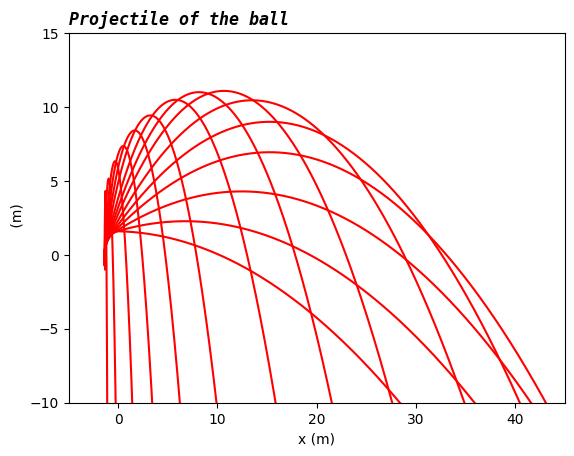

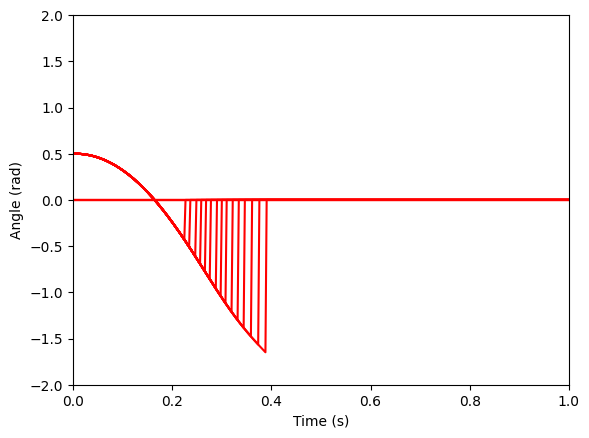

In [5]:
# ANDY's code

import numpy as np
import matplotlib.pyplot as plt


def trebuchet(x, y, angle_theta, NP, t, dt):
    # Constants
    g = 9.81  # m/s^2  (Acceleration of Gravity on earth)
    M = 133  # kg    (Mass of the counterweight)
    m = 1  # kg      (Mass of the projectile)
    L1 = 1 / 5  # m    (Length of the counterweight arm)
    L2 = 4 / 5  # m    (Length of the throwing arm)
    L3 = 4 / 5  # m    (Length of the rope/sling)
    h = 0  # m
    phiInit = np.pi * 3 / 4  # -rad      (inital sling angle)
    thetaInit = 0.5  # rad           (inital arm angle)

    for p in range(25, 100, 5):
        launchTheta = p * np.pi / 180  # rad    (Launch angle)

        # Initial Angular Velocity
        phiDInit = 0
        thetaDInit = 0

        phiDD = np.zeros([NP])
        phiD = np.zeros([NP])
        phi = np.zeros([NP])

        thetaDD = np.zeros([NP])
        thetaD = np.zeros([NP])
        theta = np.zeros([NP])

        yM = np.zeros([NP])
        xM = np.zeros([NP])

        ym = np.zeros([NP])
        xm = np.zeros([NP])

        ####initializing position and velocity
        phi[0] = phiInit
        phiD[0] = phiDInit

        theta[0] = thetaInit
        thetaD[0] = phiDInit

        yM[0] = L1 * np.sin(thetaInit) + h
        xM[0] = L1 * np.cos(thetaInit)

        ym[0] = -L2 * np.sin(thetaInit) - L3 * np.sin(phiInit) + h
        xm[0] = -L2 * np.cos(thetaInit) + L3 * np.cos(phiInit)

        # Verlet Initialization
        phiDD[0] = (
            -2 * L2 * L3 * thetaDD[0] * np.cos(theta[0] + phi[0])
            + 2
            * L3
            * L2
            * thetaD[0]
            * (thetaD[0] + phiD[0])
            * np.sin(theta[0] + phi[0])
            + m * g * L3 * np.cos(phi[0])
            - 2 * L3 * L2 * phiD[0] * thetaD[0] * np.sin(theta[0] + phi[0])
        ) / (m * L3**2)
        phiOld = phi[0] - phiD[0] * dt + 0.5 * phiDD[0] * dt**2
        phiNow = phi[0]
        phiNew = 0

        thetaDD[0] = (
            -M * g * L1 * np.cos(theta[0])
            + m * g * L2 * np.cos(theta[0])
            - 2 * L3 * L2 * thetaD[0] * phiD[0] * np.sin(theta[0] + phi[0])
            - 2 * L3 * L2 * phiDD[0] * np.cos(theta[0] + phi[0])
            + 2 * L3 * L2 * phiD[0] * (thetaD[0] + phiD[0]) * np.sin(theta[0] + phi[0])
        ) / (M * L1**2 + m * L2**2)
        thetaOld = theta[0] - thetaD[0] * dt + 0.5 * thetaDD[0] * dt**2
        thetaNow = theta[0]
        thetaNew = 0

        j = 0
        while thetaNow > -launchTheta:  # Treduchet Motion
            j += 1
            phi[j] = phiNow
            theta[j] = thetaNow

            phiDD[j] = (
                -2 * L2 * L3 * thetaDD[j] * np.cos(theta[j] + phi[j])
                + 2
                * L3
                * L2
                * thetaD[j]
                * (thetaD[j] + phiD[j])
                * np.sin(theta[j] + phi[j])
                + m * g * L3 * np.cos(phi[j])
                - 2 * L3 * L2 * phiD[j] * thetaD[j] * np.sin(theta[j] + phi[j])
            ) / (m * L3**2)
            thetaDD[j] = (
                -M * g * L1 * np.cos(theta[j])
                + m * g * L2 * np.cos(theta[j])
                - 2 * L3 * L2 * thetaD[j] * phiD[j] * np.sin(theta[j] + phi[j])
                - 2 * L3 * L2 * phiDD[j] * np.cos(theta[j] + phi[j])
                + 2
                * L3
                * L2
                * phiD[j]
                * (thetaD[j] + phiD[j])
                * np.sin(theta[j] + phi[j])
            ) / (M * L1**2 + m * L2**2)

            phiNew = 2 * phiNow - phiOld + dt**2 * phiDD[j]
            phiOld = phiNow
            phiNow = phiNew

            thetaNew = 2 * thetaNow - thetaOld + dt**2 * thetaDD[j]
            thetaOld = thetaNow
            thetaNow = thetaNew

            phiD[j + 1] = phiD[j] + phiDD[j] * dt
            thetaD[j + 1] = thetaD[j] + thetaDD[j] * dt

            yM[j] = L1 * np.sin(thetaNow) + h
            xM[j] = L1 * np.cos(thetaNow)
            ym[j] = -L2 * np.sin(thetaNow) - L3 * np.sin(phiNow) + h
            xm[j] = -L2 * np.cos(thetaNow) + L3 * np.cos(phiNow)

        launchYm = ym[j]
        launchXm = xm[j]

        ymDInit = -L2 * thetaD[j] * np.cos(theta[j]) - L3 * phiD[j] * np.cos(phi[j])
        xmDInit = L2 * thetaD[j] * np.sin(theta[j]) - L3 * phiD[j] * np.sin(phi[j])

        c = 0
        while j < (NP - 1):  # Begin Projectile Motion
            j += 1
            c += 1
            ym[j] = ymDInit * (c) * dt - g / 2 * ((c) * dt) ** 2 + launchYm
            xm[j] = xmDInit * (c) * dt + launchXm

        r = int(p / 5)
        x[:, r] = xm
        y[:, r] = ym
        angle_theta[:, r] = theta
    return x, y, angle_theta


def main():
    NP = 2**12
    i = np.linspace(1, NP, NP)
    total_time = 10
    dt = total_time / NP
    t = i * dt

    x = np.zeros([NP, 20])
    y = np.zeros([NP, 20])
    angle_theta = np.zeros([NP, 20])

    xm, ym, angle_theta = trebuchet(x, y, angle_theta, NP, t, dt)

    plt.figure(1)
    plt.plot(xm, ym, color="red", label="Position")
    plt.title(
        "Projectile of the ball",
        fontsize="large",
        loc="left",
        fontweight="bold",
        style="italic",
        family="monospace",
    )
    plt.xlabel("x (m)")
    plt.ylabel(" (m)")
    plt.xlim(-5, 45)
    plt.ylim(-10, 15)

    plt.figure(2)
    plt.plot(t, angle_theta, "-r", label="angle")
    plt.xlabel("Time (s)")
    plt.ylabel("Angle (rad)")
    plt.ylim(-2, 2)
    plt.xlim(0, 1)

    plt.show()


main()

Best max distance: 148.26 m, with Phi Init: 2.83 rad


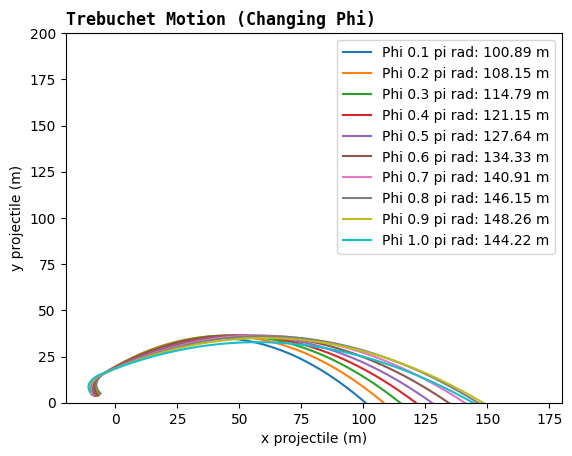

In [18]:
import numpy as np
import matplotlib.pyplot as plt

plt.xlabel("x projectile (m)")
plt.ylabel("y projectile (m)")
plt.ylim(0, 200)
plt.xlim(-20, 180)
plt.title(
    "Trebuchet Motion (Changing Phi)",
    fontsize="large",
    loc="left",
    fontweight="bold",
    style="normal",
    family="monospace",
)

max_distances = []

for u in range(1, 11):
    NP = 2**12  # number of simulation points
    i = np.linspace(1, NP, NP)
    total_time = 10  # total time of flight sec
    dt = total_time / NP  # delta t
    t = i * dt  # array of accumulated time in sec

    # Constants
    g = 9.81  # m/s^2  (Acceleration of Gravity on earth)
    m = 550  # kg      (Mass of the projectile)
    M = m * 133  # kg    (Mass of the counterweight)
    L1 = 10 * 1 / 10  # m    (Length of the counterweight arm)
    L2 = 10 * 9 / 10  # m    (Length of the throwing arm)
    L3 = 10 * 2 / 10  # m    (Length of the rope/sling)
    h = 10  # m
    phiInit = np.pi * u / 10  # -rad      (initial sling angle)
    thetaInit = 0.5  # rad          (initial arm angle)
    launchTheta = np.pi * 3 / 10  # rad    (Launch angle)

    # Initial Angular Velocity
    phiDInit = 0
    thetaDInit = 0

    # Initialize arrays
    phiDD = np.zeros([NP])
    phiD = np.zeros([NP])
    phi = np.zeros([NP])

    thetaDD = np.zeros([NP])
    thetaD = np.zeros([NP])
    theta = np.zeros([NP])

    yM = np.zeros([NP])
    xM = np.zeros([NP])

    ym = np.zeros([NP])
    xm = np.zeros([NP])

    # Initializing position and velocity
    phi[0] = phiInit
    phiD[0] = phiDInit

    theta[0] = thetaInit
    thetaD[0] = thetaDInit

    yM[0] = L1 * np.sin(thetaInit) + h
    xM[0] = L1 * np.cos(thetaInit)

    ym[0] = -L2 * np.sin(thetaInit) - L3 * np.sin(phiInit) + h
    xm[0] = -L2 * np.cos(thetaInit) + L3 * np.cos(phiInit)

    # Verlet Initialization
    phiDD[0] = (
        -2 * L2 * L3 * thetaDD[0] * np.cos(theta[0] + phi[0])
        + 2 * L3 * L2 * thetaD[0] * (thetaD[0] + phiD[0]) * np.sin(theta[0] + phi[0])
        + m * g * L3 * np.cos(phi[0])
        - 2 * L3 * L2 * phiD[0] * thetaD[0] * np.sin(theta[0] + phi[0])
    ) / (m * L3**2)
    phiOld = phi[0] - phiD[0] * dt + 0.5 * phiDD[0] * dt**2
    phiNow = phi[0]
    phiNew = 0

    thetaDD[0] = (
        -M * g * L1 * np.cos(theta[0])
        + m * g * L2 * np.cos(theta[0])
        - 2 * L3 * L2 * thetaD[0] * phiD[0] * np.sin(theta[0] + phi[0])
        - 2 * L3 * L2 * phiDD[0] * np.cos(theta[0] + phi[0])
        + 2 * L3 * L2 * phiD[0] * (thetaD[0] + phiD[0]) * np.sin(theta[0] + phi[0])
    ) / (M * L1**2 + m * L2**2)
    thetaOld = theta[0] - thetaD[0] * dt + 0.5 * thetaDD[0] * dt**2
    thetaNow = theta[0]
    thetaNew = 0

    j = 0

    while thetaNow > -launchTheta:  # Trebuchet Motion
        j = j + 1
        phi[j] = phiNow
        theta[j] = thetaNow

        phiDD[j] = (
            -2 * L2 * L3 * thetaDD[j] * np.cos(theta[j] + phi[j])
            + 2 * L3 * L2 * thetaD[j] * (thetaD[j] + phiD[j]) * np.sin(theta[j] + phi[j])
            + m * g * L3 * np.cos(phi[j])
            - 2 * L3 * L2 * phiD[j] * thetaD[j] * np.sin(theta[j] + phi[j])
        ) / (m * L3**2)
        thetaDD[j] = (
            -M * g * L1 * np.cos(theta[j])
            + m * g * L2 * np.cos(theta[j])
            - 2 * L3 * L2 * thetaD[j] * phiD[j] * np.sin(theta[j] + phi[j])
            - 2 * L3 * L2 * phiDD[j] * np.cos(theta[j] + phi[j])
            + 2 * L3 * L2 * phiD[j] * (thetaD[j] + phiD[j]) * np.sin(theta[j] + phi[j])
        ) / (M * L1**2 + m * L2**2)

        phiNew = 2 * phiNow - phiOld + dt**2 * phiDD[j]
        phiOld = phiNow
        phiNow = phiNew

        thetaNew = 2 * thetaNow - thetaOld + dt**2 * thetaDD[j]
        thetaOld = thetaNow
        thetaNow = thetaNew

        phiD[j + 1] = phiD[j] + phiDD[j] * dt
        thetaD[j + 1] = thetaD[j] + thetaDD[j] * dt

        yM[j] = L1 * np.sin(thetaNow) + h
        xM[j] = L1 * np.cos(thetaNow)
        ym[j] = -L2 * np.sin(thetaNow) - L3 * np.sin(phiNow) + h
        xm[j] = -L2 * np.cos(thetaNow) + L3 * np.cos(phiNow)

    launchYm = ym[j]
    launchXm = xm[j]

    ymDInit = -L2 * thetaD[j] * np.cos(theta[j]) - L3 * phiD[j] * np.cos(phi[j])
    xmDInit = L2 * thetaD[j] * np.sin(theta[j]) - L3 * phiD[j] * np.sin(phi[j])

    c = 0
    while j < (NP - 1):  # Begin Projectile Motion
        j = j + 1
        c = c + 1
        ym[j] = ymDInit * (c) * dt - g / 2 * ((c) * dt) ** 2 + launchYm
        xm[j] = xmDInit * (c) * dt + launchXm

    valid_indices = ym > 0
    valid_xm = xm[valid_indices]

    if valid_xm.size > 0:
        max_distance = np.max(valid_xm)
    else:
        max_distance = 0  # If no valid points, set max_distance to 0

    max_distances.append({"max_distance": max_distance, "phi": phiInit})
    plt.plot(xm, ym, label=f"Phi {u / 10} pi rad: {max_distance:.2f} m")

plt.legend(loc="upper right")
best_scenario = max(max_distances, key=lambda x: x["max_distance"])
print(
    f"Best max distance: {best_scenario['max_distance']:.2f} m, with Phi Init: {best_scenario['phi']:.2f} rad"
)
plt.show()

1.0 m
2.0 m
3.0 m
4.0 m
5.0 m
6.0 m
7.0 m
8.0 m
9.0 m
10.0 m


/var/folders/wf/z4tv10k514s5crbpwmmlr9sr0000gn/T/ipykernel_66384/3099786337.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right")


KeyError: 'rope_length'

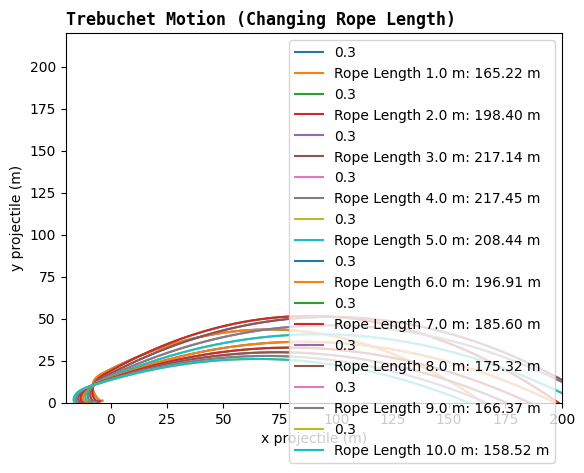

In [26]:
import numpy as np
import matplotlib.pyplot as plt

plt.legend(loc="upper right")
plt.xlabel("x projectile (m)")
plt.ylabel("y projectile (m)")
plt.ylim(-0, 220)
plt.xlim(-20, 200)
plt.title(
    "Trebuchet Motion (Changing Rope Length)",
    fontsize="large",
    loc="left",
    fontweight="bold",
    style="normal",
    family="monospace",
)


for u in range(1, 11):
    NP = 2**12  # number of simulation points
    i = np.linspace(
        1, NP, NP
    )  # creates an array of integers from 1 to NP in steps of 1
    total_time = 10  # total time of flight sec
    dt = total_time / NP  #  %delta t
    t = i * dt  # array of accumulated time in sec

    # Constants
    g = 9.81  # m/s^2  (Acceleration of Gravity on earth)
    m = 550  # kg      (Mass of the projectile)
    M = m * 133  # kg    (Mass of the counterweight)
    L1 = 10 * 1 / 10  # m    (Length of the counterweight arm)
    L2 = 10 * 9 / 10  # m    (Length of the throwing arm)
    L3 = 10 * u / 10  # m    (Length of the rope/sling)
    h = 10  # m
    phiInit = np.pi * 9 / 10  # -rad      (inital sling angle)
    thetaInit = np.pi * 8 / 20  # rad          (inital arm angle)
    launchTheta = np.pi * 3 / 10  # rad    (Launch angle)
    # Initial Angular Velocity
    phiDInit = 0
    thetaDInit = 0

    ###initialize arrays to be an array of all zeros (defining an array of zeros rather than an empty one helps the computer save memory
    # when updating vlaues those values to real physical values
    phiDD = np.zeros([NP])
    phiD = np.zeros([NP])
    phi = np.zeros([NP])

    thetaDD = np.zeros([NP])
    thetaD = np.zeros([NP])
    theta = np.zeros([NP])

    yM = np.zeros([NP])
    xM = np.zeros([NP])

    ym = np.zeros([NP])
    xm = np.zeros([NP])

    ####initializing position and velocity
    phi[0] = phiInit
    phiD[0] = phiDInit

    theta[0] = thetaInit
    thetaD[0] = phiDInit

    yM[0] = L1 * np.sin(thetaInit) + h
    xM[0] = L1 * np.cos(thetaInit)

    ym[0] = -L2 * np.sin(thetaInit) - L3 * np.sin(phiInit) + h
    xm[0] = -L2 * np.cos(thetaInit) + L3 * np.cos(phiInit)

    # Verlet Initialization
    phiDD[0] = (
        -2 * L2 * L3 * thetaDD[0] * np.cos(theta[0] + phi[0])
        + 2 * L3 * L2 * thetaD[0] * (thetaD[0] + phiD[0]) * np.sin(theta[0] + phi[0])
        + m * g * L3 * np.cos(phi[0])
        - 2 * L3 * L2 * phiD[0] * thetaD[0] * np.sin(theta[0] + phi[0])
    ) / (m * L3**2)
    phiOld = phi[0] - phiD[0] * dt + 0.5 * phiDD[0] * dt**2
    phiNow = phi[0]
    phiNew = 0

    thetaDD[0] = (
        -M * g * L1 * np.cos(theta[0])
        + m * g * L2 * np.cos(theta[0])
        - 2 * L3 * L2 * thetaD[0] * phiD[0] * np.sin(theta[0] + phi[0])
        - 2 * L3 * L2 * phiDD[0] * np.cos(theta[0] + phi[0])
        + 2 * L3 * L2 * phiD[0] * (thetaD[0] + phiD[0]) * np.sin(theta[0] + phi[0])
    ) / (M * L1**2 + m * L2**2)
    thetaOld = theta[0] - thetaD[0] * dt + 0.5 * thetaDD[0] * dt**2
    thetaNow = theta[0]
    thetaNew = 0

    j = 0

    while thetaNow > -launchTheta:  # Treduchet Motion
        j = j + 1
        phi[j] = phiNow
        theta[j] = thetaNow

        phiDD[j] = (
            -2 * L2 * L3 * thetaDD[j] * np.cos(theta[j] + phi[j])
            + 2
            * L3
            * L2
            * thetaD[j]
            * (thetaD[j] + phiD[j])
            * np.sin(theta[j] + phi[j])
            + m * g * L3 * np.cos(phi[j])
            - 2 * L3 * L2 * phiD[j] * thetaD[j] * np.sin(theta[j] + phi[j])
        ) / (m * L3**2)
        thetaDD[j] = (
            -M * g * L1 * np.cos(theta[j])
            + m * g * L2 * np.cos(theta[j])
            - 2 * L3 * L2 * thetaD[j] * phiD[j] * np.sin(theta[j] + phi[j])
            - 2 * L3 * L2 * phiDD[j] * np.cos(theta[j] + phi[j])
            + 2 * L3 * L2 * phiD[j] * (thetaD[j] + phiD[j]) * np.sin(theta[j] + phi[j])
        ) / (M * L1**2 + m * L2**2)

        phiNew = 2 * phiNow - phiOld + dt**2 * phiDD[j]
        phiOld = phiNow
        phiNow = phiNew

        thetaNew = 2 * thetaNow - thetaOld + dt**2 * thetaDD[j]
        thetaOld = thetaNow
        thetaNow = thetaNew

        phiD[j + 1] = phiD[j] + phiDD[j] * dt
        thetaD[j + 1] = thetaD[j] + thetaDD[j] * dt

        yM[j] = L1 * np.sin(thetaNow) + h
        xM[j] = L1 * np.cos(thetaNow)
        ym[j] = -L2 * np.sin(thetaNow) - L3 * np.sin(phiNow) + h
        xm[j] = -L2 * np.cos(thetaNow) + L3 * np.cos(phiNow)

    launchYm = ym[j]
    launchXm = xm[j]

    ymDInit = -L2 * thetaD[j] * np.cos(theta[j]) - L3 * phiD[j] * np.cos(phi[j])
    xmDInit = L2 * thetaD[j] * np.sin(theta[j]) - L3 * phiD[j] * np.sin(phi[j])

    c = 0
    while j < (NP - 1):  # Begin Projectile Motion
        j = j + 1
        c = c + 1
        ym[j] = ymDInit * (c) * dt - g / 2 * ((c) * dt) ** 2 + launchYm
        xm[j] = xmDInit * (c) * dt + launchXm

    """
        plt.figure()
        plt.plot(t,theta,"-r", label="angle")

        plt.legend(loc="upper right")
        plt.xlabel('Time (s)')
        plt.ylabel('Angle (rad)')
        plt.ylim(-20, 20)
        plt.xlim(0,10)

        plt.figure()
        plt.plot(xM,yM, color = "red", label="Position")

        plt.legend(loc="upper right")
        plt.xlabel('x projectile (m)')
        plt.ylabel('y projectile (m)')
        plt.ylim(-10, 10)
        plt.xlim(-10, 10)
        """
    if u < 20:
        plt.plot(xm, ym, label=(launchTheta / np.pi))
        print(L3, "m")

    valid_indices = ym > 0
    valid_xm = xm[valid_indices]

    if valid_xm.size > 0:
        max_distance = np.max(valid_xm)
    else:
        max_distance = 0  # If no valid points, set max_distance to 0

    max_distances.append({"max_distance": max_distance, "rope_length": L3})
    plt.plot(xm, ym, label=f"Rope Length {L3} m: {max_distance:.2f} m")

plt.legend(loc="upper right")
best_scenario = max(max_distances, key=lambda x: x["max_distance"])
print(
    f"Best max distance: {best_scenario['max_distance']:.2f} m, with Rope Length: {best_scenario['rope_length']:.2f} m"
)
plt.show()

4.0 m
4.0 m
4.0 m
4.0 m
4.0 m
4.0 m
4.0 m
4.0 m
4.0 m
4.0 m
Best max distance: 242.65 m, with Phi: 3.14 rad
u from phi init 10.0


/var/folders/wf/z4tv10k514s5crbpwmmlr9sr0000gn/T/ipykernel_66384/25501867.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right")


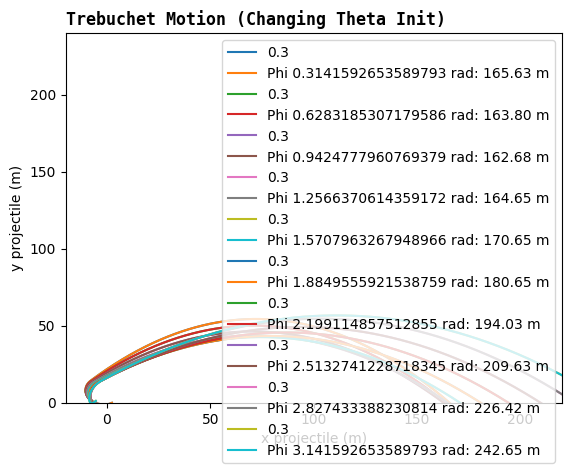

In [32]:
import numpy as np
import matplotlib.pyplot as plt

plt.legend(loc="upper right")
plt.xlabel("x projectile (m)")
plt.ylabel("y projectile (m)")
plt.ylim(-0, 240)
plt.xlim(-20, 220)
plt.title(
    "Trebuchet Motion (Changing Theta Init)",
    fontsize="large",
    loc="left",
    fontweight="bold",
    style="normal",
    family="monospace",
)


for u in range(1, 11):
    NP = 2**12  # number of simulation points
    i = np.linspace(
        1, NP, NP
    )  # creates an array of integers from 1 to NP in steps of 1
    total_time = 15  # total time of flight sec
    dt = total_time / NP  #  %delta t
    t = i * dt  # array of accumulated time in sec

    # Constants
    g = 9.81  # m/s^2  (Acceleration of Gravity on earth)
    m = 550  # kg      (Mass of the projectile)
    M = m * 133  # kg    (Mass of the counterweight)
    L1 = 10 * 1 / 10  # m    (Length of the counterweight arm)
    L2 = 10 * 9 / 10  # m    (Length of the throwing arm)
    L3 = 10 * 4 / 10  # m    (Length of the rope/sling)
    h = 10  # m
    phiInit = np.pi*u/10 #-rad      (inital sling angle)
    thetaInit = np.pi*9/20 #rad          (inital arm angle)
    launchTheta = np.pi*3/10 #rad    (Launch angle)
    # Initial Angular Velocity
    phiDInit = 0
    thetaDInit = 0

    ###initialize arrays to be an array of all zeros (defining an array of zeros rather than an empty one helps the computer save memory
    # when updating vlaues those values to real physical values
    phiDD = np.zeros([NP])
    phiD = np.zeros([NP])
    phi = np.zeros([NP])

    thetaDD = np.zeros([NP])
    thetaD = np.zeros([NP])
    theta = np.zeros([NP])

    yM = np.zeros([NP])
    xM = np.zeros([NP])

    ym = np.zeros([NP])
    xm = np.zeros([NP])

    ####initializing position and velocity
    phi[0] = phiInit
    phiD[0] = phiDInit

    theta[0] = thetaInit
    thetaD[0] = phiDInit

    yM[0] = L1 * np.sin(thetaInit) + h
    xM[0] = L1 * np.cos(thetaInit)

    ym[0] = -L2 * np.sin(thetaInit) - L3 * np.sin(phiInit) + h
    xm[0] = -L2 * np.cos(thetaInit) + L3 * np.cos(phiInit)

    # Verlet Initialization
    phiDD[0] = (
        -2 * L2 * L3 * thetaDD[0] * np.cos(theta[0] + phi[0])
        + 2 * L3 * L2 * thetaD[0] * (thetaD[0] + phiD[0]) * np.sin(theta[0] + phi[0])
        + m * g * L3 * np.cos(phi[0])
        - 2 * L3 * L2 * phiD[0] * thetaD[0] * np.sin(theta[0] + phi[0])
    ) / (m * L3**2)
    phiOld = phi[0] - phiD[0] * dt + 0.5 * phiDD[0] * dt**2
    phiNow = phi[0]
    phiNew = 0

    thetaDD[0] = (
        -M * g * L1 * np.cos(theta[0])
        + m * g * L2 * np.cos(theta[0])
        - 2 * L3 * L2 * thetaD[0] * phiD[0] * np.sin(theta[0] + phi[0])
        - 2 * L3 * L2 * phiDD[0] * np.cos(theta[0] + phi[0])
        + 2 * L3 * L2 * phiD[0] * (thetaD[0] + phiD[0]) * np.sin(theta[0] + phi[0])
    ) / (M * L1**2 + m * L2**2)
    thetaOld = theta[0] - thetaD[0] * dt + 0.5 * thetaDD[0] * dt**2
    thetaNow = theta[0]
    thetaNew = 0

    j = 0

    while thetaNow > -launchTheta:  # Treduchet Motion
        j = j + 1
        phi[j] = phiNow
        theta[j] = thetaNow

        phiDD[j] = (
            -2 * L2 * L3 * thetaDD[j] * np.cos(theta[j] + phi[j])
            + 2
            * L3
            * L2
            * thetaD[j]
            * (thetaD[j] + phiD[j])
            * np.sin(theta[j] + phi[j])
            + m * g * L3 * np.cos(phi[j])
            - 2 * L3 * L2 * phiD[j] * thetaD[j] * np.sin(theta[j] + phi[j])
        ) / (m * L3**2)
        thetaDD[j] = (
            -M * g * L1 * np.cos(theta[j])
            + m * g * L2 * np.cos(theta[j])
            - 2 * L3 * L2 * thetaD[j] * phiD[j] * np.sin(theta[j] + phi[j])
            - 2 * L3 * L2 * phiDD[j] * np.cos(theta[j] + phi[j])
            + 2 * L3 * L2 * phiD[j] * (thetaD[j] + phiD[j]) * np.sin(theta[j] + phi[j])
        ) / (M * L1**2 + m * L2**2)

        phiNew = 2 * phiNow - phiOld + dt**2 * phiDD[j]
        phiOld = phiNow
        phiNow = phiNew

        thetaNew = 2 * thetaNow - thetaOld + dt**2 * thetaDD[j]
        thetaOld = thetaNow
        thetaNow = thetaNew

        phiD[j + 1] = phiD[j] + phiDD[j] * dt
        thetaD[j + 1] = thetaD[j] + thetaDD[j] * dt

        yM[j] = L1 * np.sin(thetaNow) + h
        xM[j] = L1 * np.cos(thetaNow)
        ym[j] = -L2 * np.sin(thetaNow) - L3 * np.sin(phiNow) + h
        xm[j] = -L2 * np.cos(thetaNow) + L3 * np.cos(phiNow)

    launchYm = ym[j]
    launchXm = xm[j]

    ymDInit = -L2 * thetaD[j] * np.cos(theta[j]) - L3 * phiD[j] * np.cos(phi[j])
    xmDInit = L2 * thetaD[j] * np.sin(theta[j]) - L3 * phiD[j] * np.sin(phi[j])

    c = 0
    while j < (NP - 1):  # Begin Projectile Motion
        j = j + 1
        c = c + 1
        ym[j] = ymDInit * (c) * dt - g / 2 * ((c) * dt) ** 2 + launchYm
        xm[j] = xmDInit * (c) * dt + launchXm

    """
        plt.figure()
        plt.plot(t,theta,"-r", label="angle")

        plt.legend(loc="upper right")
        plt.xlabel('Time (s)')
        plt.ylabel('Angle (rad)')
        plt.ylim(-20, 20)
        plt.xlim(0,10)

        plt.figure()
        plt.plot(xM,yM, color = "red", label="Position")

        plt.legend(loc="upper right")
        plt.xlabel('x projectile (m)')
        plt.ylabel('y projectile (m)')
        plt.ylim(-10, 10)
        plt.xlim(-10, 10)
        """
    if u < 20:
        plt.plot(xm, ym, label=(launchTheta / np.pi))
        print(L3, "m")
        
    valid_indices = ym > 0
    valid_xm = xm[valid_indices]

    if valid_xm.size > 0:
        max_distance = np.max(valid_xm)
    else:
        max_distance = 0  # If no valid points, set max_distance to 0

    max_distances.append({"max_distance": max_distance, "phi": phiInit})
    plt.plot(xm, ym, label=f"Phi {phiInit} rad: {max_distance:.2f} m")

plt.legend(loc="upper right")
best_scenario = max(max_distances, key=lambda x: x["max_distance"])
print(
    f"Best max distance: {best_scenario['max_distance']:.2f} m, with Phi: {best_scenario['phi']:.2f} rad"
)
print("u from phi init", best_scenario["phi"] / np.pi * 10)

plt.show()